<a href="https://colab.research.google.com/github/SkandeshRanganathan/Skandesh-s-portfolio/blob/main/img2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

In [3]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


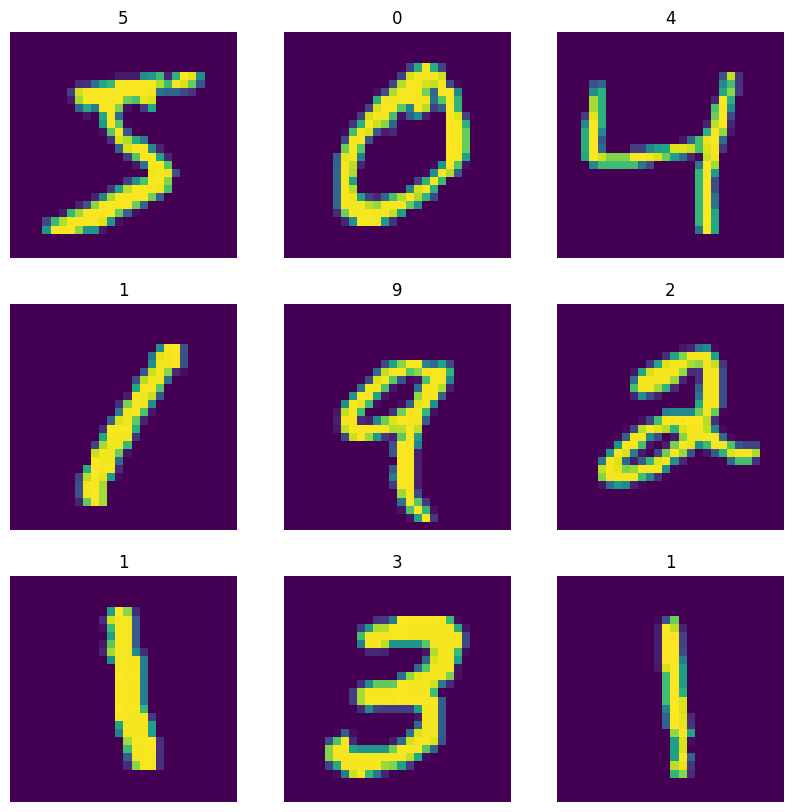

In [7]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [14]:

x_train = keras.utils.normalize(x_train, axis=1) # Now keras is defined
x_test = keras.utils.normalize(x_test, axis=1)

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(784,)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
# Reshape x_train and x_test to (num_samples, 784) before fitting the model
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Now fit the model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8136 - loss: 0.6337 - val_accuracy: 0.9509 - val_loss: 0.1645
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9558 - loss: 0.1486 - val_accuracy: 0.9672 - val_loss: 0.1104
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9697 - loss: 0.0997 - val_accuracy: 0.9698 - val_loss: 0.0927
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9778 - loss: 0.0737 - val_accuracy: 0.9715 - val_loss: 0.0976
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9828 - loss: 0.0541 - val_accuracy: 0.9751 - val_loss: 0.0831
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9864 - loss: 0.0420 - val_accuracy: 0.9767 - val_loss: 0.0742
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9896 - loss: 0.0347 - val_accuracy: 0.9770 - val_loss: 0.0773
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9905 - loss: 0.0297 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This digit is probably a 2
2


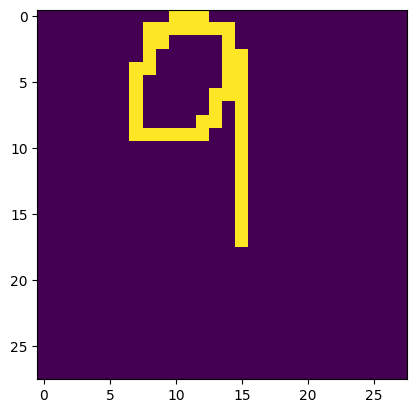

In [31]:
import cv2
os.chdir('/content/sample_data')

image = cv2.imread("Untitled.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28,28))
image = np.invert(np.array([image]))

# Flatten the image before prediction
image = image.reshape(1, 784) # Reshape to (1, 784)

prediction = model.predict(image)
plt.imshow(image[0].reshape(28, 28)) # Reshape back for display
print(f"This digit is probably a {np.argmax(prediction)}")
print(np.argmax(prediction))

In [32]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.1209
Loss: 0.11167286336421967
Accuracy: 0.9743000268936157


In [33]:
model.save('/content/handwritten.keras')

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 3s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴npm notice
npm notice New major version of npm available! 10.8.2 -> 11.0.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.0.0
npm notice To update run: npm install -g npm@11.0.0
npm notice
⠴

In [ ]:
!streamlit run /content/app.py &> /content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://kind-dragons-think.loca.lt
